## Искусственный нейрон

 В задачах классификации активационная функция должна иметь характеристику "включателя". Иными словами, выход должен изменять состояние с 0 на 1 или наоборот. Это имитирует "включение" биологического нейрона. В качестве активационной функции обычно используют сигмоидальную функцию.
 ![alt text](https://media.proglib.io/wp-uploads/2017/07/2.1.jpg)

In [0]:
import matplotlib.pylab as plt
import numpy as np

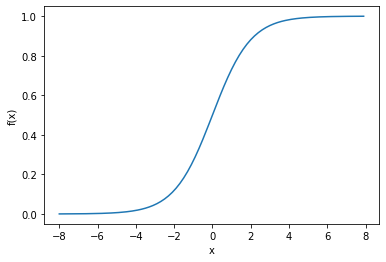

In [2]:
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Функция растет с 0 до 1 с каждым увеличением значения х. 
Сигмоидальная функция является гладкой и непрерывной, поэтому она имеет производную (и это хорошо - пригодится для обучения!)

## Узлы

Каждый узел принимает взвешенный вход, активирует активационную функцию для суммы входов и генерирует выход.
![alt text](https://media.proglib.io/wp-uploads/-000//1/Node-diagram.jpg)

Узел принимает взвешенные входы, складывает их, а затем вводит их в активационную функцию, которая выдает вероятность.

Взвешенный вход в узел имеет вид:
![alt text](https://media.proglib.io/wp-uploads/2017/07/2.2.jpg)

***wi*** - числовые значения веса, ***b*** является весом элемента смещения, его включение делает узел гибким.

## Смещение

![alt text](https://media.proglib.io/wp-uploads/-000//1/5960f8379203e_Simple-node.jpg)

Ввод для активационной функции в этом узле = **x1w1**. 

Проведем эксперемент - зададим разные значение веса. Очевидно, что при изменении веса изменяется также уровень наклона графика активационной функции.

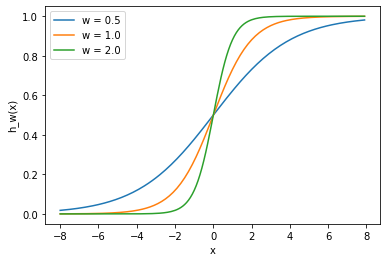

In [6]:
w1 = 0.5
w2 = 1.0
w3 = 2.0

l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
  f = 1 / (1 + np.exp(-x * w))
  plt.plot(x, f, label = l)
  plt.xlabel('x')
  plt.ylabel('h_w(x)')
  plt.legend(loc = 2)
plt.show()

Так моделируются различные плотности взаимосвязей между входами и выходами. 

Но для того, чтобы выход изменялся только при ***х*** более 1 нужно смещение. 

Рассмотрим такую сеть со смещением на входе:

![alt text](https://media.proglib.io/wp-uploads/-000//1/5960f838e77b1_Simple-node-with-bias.png)

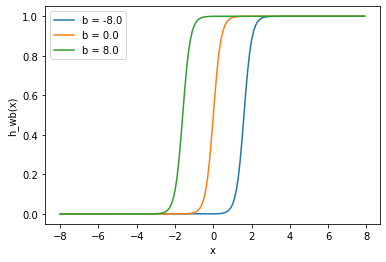

In [7]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
  f = 1 / (1 + np.exp(-(x * w + b)))
  plt.plot(x, f, label = l)
  plt.xlabel('x')
  plt.ylabel('h_wb(x)')
  plt.legend(loc = 2)
plt.show()

Из графика можно увидеть, что меняя "вес" смещения b, можно изменять время запуска узла. 

## Составленная структура

Полная нейронная сеть состоит из множества узлов.
Самая распространенная структура состоит из входного слоя, скрытого слоя и выходного слоя. Что-то вроде этого:

![alt text](https://media.proglib.io/wp-uploads/-000//1/5960f83a3d545_KpeD0WH.png)

Тут есть три слоя сети: Слой 1 является входным слоем, где сеть принимает внешние входные данные. Слой 2 называют скрытым слоем, этот слой не является частью ни входа, ни выхода.

Каждый узел в Ш1 имеет связь со всеми узлами в Ш2, при этом от каждого узла в Ш2 идет по одной связи к единому выходному узлу в Ш3. Каждая из этих связей должна иметь соответствующий вес.

## Процесс прямого распространения

Нахождение выхода из нейронной сети (Слой 3 из примера) можно записать следующим образом:
![alt text](https://media.proglib.io/wp-uploads/2017/07/3.jpg)

 ***f(∙)*** - активационная функция узла, в нашем случае сигмоидальная функция.
 **h1(2)** - выход первого узла во втором слое, его входами соответственно являются w11(1)x1(1), w12(1)x2(1),w13(1)x3(1) и b1(1). Эти входы было сложены, а затем переданы в активационную функцию для расчета выхода первого узла. С двумя следующими узлами аналогично.

Последняя строка рассчитывает выход единого узла в последнем третьем слое, он является конечной исходной точкой в нейронной сети. В нем вместо взвешенных входных переменных (x1,x2,x3) берутся взвешенные выходы узлов с другой слоя (h1(2),h2(2),h3(2)) и смещения. 

## Пример прямого распространения

пример первого вывода нейронной сети

![alt text](https://media.proglib.io/wp-uploads/2017/07/3.1.jpg)

In [0]:
w1 = np.array([
  [0.2, 0.2, 0.2],
  [0.4, 0.4, 0.4],
  [0.6, 0.6, 0.6]
])
# некоторые рандомные числовые значения весу каждой связи с Ш1

![alt text](https://media.proglib.io/wp-uploads/2017/07/3.1.1.jpg)

In [0]:
w2 = np.zeros((1, 3))
w2[0, : ] = np.array([0.5, 0.5, 0.5])
# аналогично Ш1

In [0]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])
# некоторые значения весу смещения в Ш1 и Ш2

In [0]:
# функция активации
def f(x):
	  return 1 / (1 + np.exp(-x))

In [0]:
# функция принимает в качестве входа номер слоя в нейронной сети, х - входной массив / вектор:

In [0]:
def simple_looped_nn_calc(n_layers, x, w, b):
  for l in range(n_layers - 1): # Формируется входной массив - перемножения весов в каждом слое
                                # Если первый слой, то входной массив равен вектору х
                                # Если слой не первый, вход для текущего слоя равен# выходу предыдущего
      if l == 0:
        node_in = x
      else: 
        node_in = h # формирует выходной массив для узлов в слое l + 1
      h = np.zeros((w[l].shape[0], ))# проходит по строкам массива весов
      for i in range(w[l].shape[0]): # считает сумму внутри активационной функции
          f_sum = 0 # проходит по столбцам массива весов
          for j in range(w[l].shape[1]):
              f_sum += w[l][i][j] * node_in[j] # добавляет смещение
              f_sum += b[l][i]

# использует активационную функцию для расчета
# i - того выхода, в данном случае h1, h2, h3
      h[i] = f(f_sum)
  return h

In [0]:
w = [w1, w2]
b = [b1, b2] # Рандомный входной вектор x
x = [1.6, 3.0, 6.0]

In [30]:
simple_looped_nn_calc(3, x, w, b)
# Функция сначала проверяет, чем является входной массив для соответствующего слоя с узлами / весами. 
# Если рассматривается первый слой, то входом для второго слоя является входной массив xx, 
# Умноженный на соответствующие веса. Если слой не первый, то входом для последующего будет выход предыдущего.

array([0.75024541])